### **HW3 Part 2: Due Date: Friday, April 23, 5PM PDT, on Gradescope.**


# Submission instructions

1. Copy this notebook into your own Google drive with its original name (for example, you can copy this notebook to a folder named `ECE180` that you create in your Google Drive).
2. Work on your own copy and after you are done, make sure all your code has executed and output of the code (if any) is visible below each code block for full credit. You are given skeleton code for Problem 1 and 2 below.
3. To submit to gradescope, download this notebook as a pdf (using `nbconvert` - instructions mentioned below and summarized in point 4, 5 here) after executing all code blocks and rename the pdf to ECE180-S21-HW3-part2-FirstName-LastName-PermNumber.pdf and then submit. **Note**: **When submitting your pdf to gradescope, please indicate the pages where your answers are located.**
4. Note: the default location for Google drive after you mount it (see below for how to mounting) `/content/drive/MyDrive`.
5. Say that the location of this notebook on your google drive is in a folder `ECE180`. Then, the full path for the notebook in Google Colab with its original name would be: `/content/drive/MyDrive/ECE180/ECE180-S21-HW3-part2.ipynb`. Towards the end of this notebook, you will see the command to convert this notebook to pdf, which would be saved as /content/drive/MyDrive/ECE180/ECE180-S21-HW3-part2.pdf. This is the pdf you will rename (point 3) and submit.

# Linear Regression using Gradient Descent

In this programming exercise, you will implement linear regression using gradient descent (without deep learning libraries such as Tensorflow or Pytorch).
You will submit this part of HW3 through a Google Colab notebook. This notebook provides a skeleton of how to organize your code adn responses to the questions asked. **Report all your answers to the questions below in your copy of this notebook and submit your copy as a separate pdf on Gradescope.**


**Dataset.** You will be using the housing dataset for this task. The input data is a 2-dimensional feature vector containing square feet and number of bedrooms and the expected output is the house price.
This housing dataset is located in the file: housing\_prices.txt in the HW3 folder in Gauchospace or it can also be found here: https://drive.google.com/file/d/1fFhs_7axS56NOyFEY-KWjmX3Zh5rzRLs/view?usp=sharing.
Each row in housing\_prices.txt contains the square footage, number of bedrooms and selling price separated by commas.

**Model.** The linear regression model we want to train is: $y = m1\cdot x1 + m2\cdot x2 + m0$. Here, $y$ is the housing price, $x1$ is the square footage, $x2$ is the number of bedrooms. The parameters of the model are $m1,m2,m0$.

**Train / Test split.** Choose the last 10 rows as your testing set and do NOT train on these samples.

Respond to each of the questionS (a) through (f) below.

**(a) Visualize your data.**

Text(0.5, 0, 'Price')

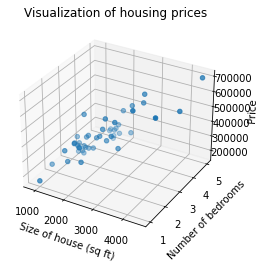

In [9]:
## visualization code here

## Insert your code here
# Load the dataset
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

data = genfromtxt('./housing_prices.txt', delimiter=',')
train = data[:-10, :]
test = data[-10:, :]

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(data[:, 0], data[:, 1], data[:, 2])
ax.set_title('Visualization of housing prices')
ax.set_xlabel('Size of house (sq ft)')
ax.set_ylabel('Number of bedrooms')
ax.set_zlabel('Price')
# Plot your data
# Refer to this material on how to generate 3d plots using matplotlib: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
# Don't forget to separate part of the data to be used only for testing



**(b) Using mean-squared error as the loss function, derive the update rule for parameters. Mention the update rule in your report.**

Update rule:

$m_{n+1} = m_n - \eta\frac{\partial L}{\partial m}$

where

$m_n$ = Weights at epoch n

$\eta$ = learning rate

L = loss function = $\frac{1}{k}\sum_{i=1}^{k} (m^Tx_i - y_i)^2$ where k = no. of samples

Therefore,

$\frac{\partial L}{\partial m}$ = $\frac{2}{n}\sum_{i=1}^{k} (m^Tx_i - y_i)x_i$ 




**(c) Using the update rule, implement and train the linear regression model. You can train the model for $10$ epochs, with a learning rate of $10^{-7}$. Show the plot of the average train and test loss as a function of the number of epochs (you can use one plot for both train and test, use a different line style and specify a legend).**

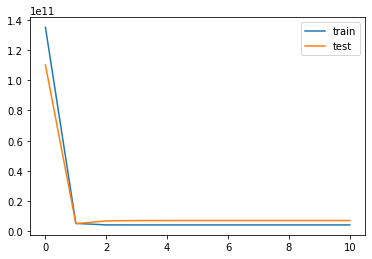

In [10]:

import pandas as pd

# Using the update rule you derived, train the linear regression model, show the code and final plot
np.random.seed(42)
ones_train = np.hstack((np.ones((data.shape[0], 1)), data[:, :2]))

class Data:
    def __init__(self, raw, dim):
        x = raw[:, :dim]
        self.X = np.hstack((np.ones((x.shape[0], 1)), x))
        self.Y = raw[:, dim]

class Model:
    def __init__(self, dim, lr=1e-7, epochs=10):
        self.weights = np.random.rand((dim+1))
        self.lr = lr
        self.epochs = epochs

    def infer(self, x):
        return np.dot(x, self.weights)

    def update(self, data):
        self.weights -= self.lr * grad_loss(data, self)
    
    def train(self, train, test):
        err = {'train': [], 'test': []}
        for epoch in range(self.epochs + 1): 
            err['train'].append(loss(train, self))
            err['test'].append(loss(test, self))
            self.update(train)
        return err

def grad_loss(data, model):
    y_err = model.infer(data.X) - data.Y
    return 2 * (data.X * y_err[:, np.newaxis]).mean(axis=0)

def loss(data, model):
    return np.mean((model.infer(data.X) - data.Y) ** 2)



train_data = Data(train, 2)
test_data = Data(test, 2)
linear_regression = Model(2)

def train_and_output_plot(train_data, test_data, model):
    history = model.train(train_data, test_data)
    # print(history)
    # do some plotting
    history_df = pd.DataFrame(data=history)
    history_df.plot(y=['train', 'test'], use_index=True)

train_and_output_plot(train_data, test_data, linear_regression)


**(d) Data Normalization: When input data or features differ by orders of magnitude, first performing feature scaling will give better results. Lets define the data normalization as follows:**
1.   **Subtract the mean value of each feature from the dataset,**
2.   **Divide the features obtained from (i) by their respective standard deviations.**

**What are the results of training with normalized data and a learning rate of $0.1$. Show the plot of the average train and test loss as a function of the number of epochs (plot train and test on a single plot as done in (c)).**


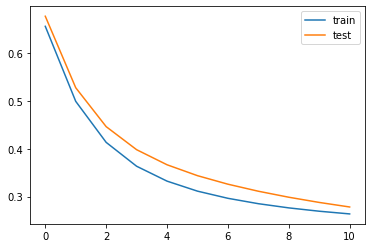

In [11]:

# Next, let's explore the effect of normalizing the data before training
# For this step, calculate the mean and standard deviation of each feature
# Then, subtract the mean from the feature values and divide by the standard deviation

# Train your model again using the normalized data
# You can define your training code on a function so that you can reuse it for this step
def normalize(dat: Data):
    res = Data(np.zeros((2, 2)), dim=1) # give some useless data
    def center_scale(arr):
        centered = arr - arr.mean(axis=0)
        std = centered.std(axis=0)
        
        std = np.where(std == 0, 1, std) # replace 0 with 1
        return centered / std
    res.X = center_scale(dat.X)
    res.Y = center_scale(dat.Y)
    return res

norm_train_data = normalize(train_data)
norm_test_data = normalize(test_data)
linear_regression = Model(2, lr=.1)

train_and_output_plot(norm_train_data, norm_test_data, linear_regression)

**(e) Compare the results of with-normalization against without-normalization and Comment on them.**


**Differences**

* The most immediate difference is that the numbers are vastly different. While without normalization the error is within the range of billions if not greater, with normalization the error is less than one. This makes sense, because an error in estimate in housing price is likely in the tens of thousands with our model. When squaring this, we get a number in the billions. In contrast, after normalization we can see that our labels are now within the range of -2 and 3. As a result, the error is significantly less.

* Another interesting difference is that with the normalized data that both our train and test loss continually decreases with the learning rate at 0.1. However, without normalization it seems like improvement stops around epoch 4. In fact, test loss actually begins to get higher after epoch 3. This means the model is overfitting on the training data, and it seems like the normalization helps with this.

* Finally, the learning rate is much higher for the normalized dataset, which is good because we can use some of our prior knowledge in finding a reasonable learning rate. 

**(f) Train the model using different learning rate values: $0.01,0.05,0.1,5,10$ WITH data normalization. For each learning rate, show the plot of the average train and test loss as a function of the number of epochs (plot train and test on a single plot as done in (c)).**

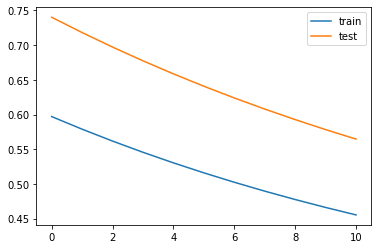

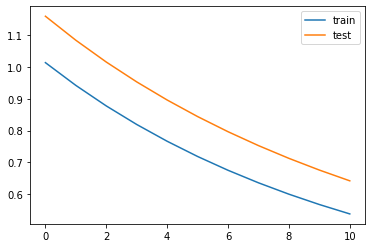

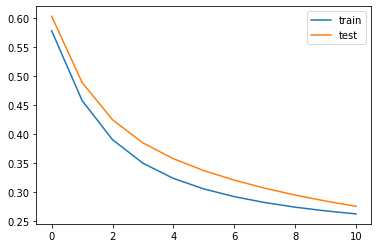

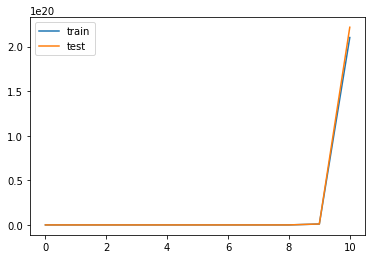

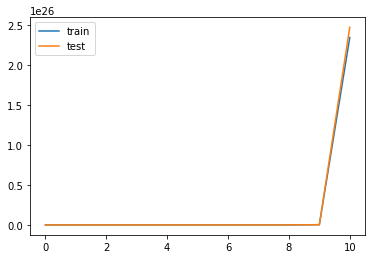

In [12]:
lrs = [.01, .05, .1, 5, 10]

for lr in lrs:
    linear_regression = Model(2, lr=lr)
    train_and_output_plot(norm_train_data, norm_test_data, linear_regression)